# Load results

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

paper_dir = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/paper/'

data_name_dict = {
    'ade': 'ADE',
    'conll04': 'CoNLL04',
    'scierc': 'SciERC',
    'yamakata': 'ERFGC',
}

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 999)
# pd.set_option('display.max_rows', 999)
def load_results(walk_path: str):
    records = []
    metric_list = ['tagger_results', 'parser_labeled_results', 'parser_unlabeled_results']
    for root, dirs, files in os.walk(walk_path):
        for F in files:
            filename = os.path.join(root, F)
            if filename.endswith('config.json'):
                filename_config = filename
                flags = filename.split('/')
                
                # Load data from config file
                df_temp = pd.read_json(filename_config)
                config_dict = json.load(open(filename))
                benchmark_dict = json.load(open(filename.replace('config.json', 'test_results_benchmark.json')))
                params = benchmark_dict['learnable params']
                val_results = config_dict['val_results']
                test_results = config_dict['test_results']
                config = config_dict['config']

                for metric in metric_list:
                    parser_rnn_type = config['parser_rnn_type']
                    par_rnn_h = config['parser_rnn_hidden_size']
                    records.append({
                        'metric': metric,
                        'val_prec': val_results[metric]['P'],
                        'val_recall': val_results[metric]['R'],
                        'val_f1': val_results[metric]['F1'],
                        'test_prec': test_results[metric]['P'],
                        'test_recall': test_results[metric]['R'],
                        'test_f1': test_results[metric]['F1'],
                        'name': config['model_name'],
                        'params': round(params / 1e6, 2),
                        'freeze_enc': 'FT' if config['freeze_encoder'] == 0 else 'frozen',
                        'lora': 'LoRA' if config['use_lora'] == 1 else '/',
                        'tag_emb': config['use_tag_embeddings_in_parser'],
                        'tag_rnn': config['use_tagger_rnn'],
                        'par_rnn': parser_rnn_type.upper() if parser_rnn_type != 'none' else '/',
                        'par_rnn_l': config['parser_rnn_layers'],
                        'par_rnn_h': par_rnn_h if par_rnn_h != 'none' else 0,
                        'data': config['dataset_name'],
                        'par_type': config['parser_type'],
                        'par_gnn_layers': config['gnn_enc_layers'],
                        'mlp_h': config['arc_representation_dim'],
                        'arc_norm': config['arc_norm'],
                        'par_res': config['parser_residual'],
                        'seed': config['seed'],
                    })
    
    # Create DataFrame from all collected records at the end
    df_aggregate = pd.DataFrame.from_records(records)
    # print(df_aggregate.columns)
    return df_aggregate

# LSTM ablations no tagger rnn

In [2]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_no_tagger'
df_no_tagger_load = load_results(walk_path)
df_no_tagger = df_no_tagger_load.drop_duplicates()
df_no_tagger = df_no_tagger[df_no_tagger['metric'] == 'parser_labeled_results']
dataset_list = df_no_tagger['data'].unique()
print(f'Samples with no tagger LSTM: {len(df_no_tagger)}')
df_no_tagger

Samples with no tagger LSTM: 3120


,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_gnn_layers,mlp_h,arc_norm,par_res,seed
1,parser_labeled_results,0.2342,0.2300,0.2321,0.2618,0.2492,0.2553,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,0
4,parser_labeled_results,0.3245,0.1970,0.2452,0.3487,0.1964,0.2513,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,1
7,parser_labeled_results,0.2511,0.2310,0.2406,0.3310,0.2872,0.3075,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,3
10,parser_labeled_results,0.2885,0.2620,0.2746,0.3541,0.2895,0.3186,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,4
13,parser_labeled_results,0.2673,0.2620,0.2646,0.3426,0.3131,0.3272,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,parser_labeled_results,0.6083,0.4844,0.5393,0.5971,0.4918,0.5393,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,3
9349,parser_labeled_results,0.6222,0.5138,0.5628,0.5927,0.5112,0.5490,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,2
9352,parser_labeled_results,0.5894,0.4899,0.5351,0.5763,0.5082,0.5401,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,0
9355,parser_labeled_results,0.6264,0.5138,0.5645,0.6426,0.5187,0.5740,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,1


# LSTM ablations w/ tagger rnn

In [3]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/Multitask-RFG-torch/results_tagger'
df_tagger_load = load_results(walk_path)
df_tagger = df_tagger_load.drop_duplicates()
df_tagger = df_tagger[df_tagger['metric'] == 'parser_labeled_results']
dataset_list = df_tagger['data'].unique()
print(f'Samples with tagger LSTM: {len(df_tagger)}')
df_tagger

Samples with tagger LSTM: 3120


,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_gnn_layers,mlp_h,arc_norm,par_res,seed
1,parser_labeled_results,0.2965,0.2120,0.2472,0.3261,0.2358,0.2737,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,0
4,parser_labeled_results,0.3202,0.2030,0.2485,0.3358,0.2135,0.2610,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,2
7,parser_labeled_results,0.2823,0.2360,0.2571,0.3534,0.2691,0.3055,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,3
10,parser_labeled_results,0.2645,0.2650,0.2647,0.3106,0.2950,0.3026,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,4
13,parser_labeled_results,0.3070,0.2530,0.2774,0.3499,0.2737,0.3072,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,parser_labeled_results,0.5852,0.4917,0.5344,0.5925,0.4978,0.5410,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,0
9349,parser_labeled_results,0.5984,0.5358,0.5653,0.5815,0.5277,0.5533,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,2
9352,parser_labeled_results,0.5859,0.5193,0.5506,0.5821,0.5351,0.5576,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,3
9355,parser_labeled_results,0.5287,0.5578,0.5429,0.5069,0.5486,0.5269,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,4


In [23]:
res_ade = df_tagger[(df_tagger['data'] == 'ade') & (df_tagger['tag_emb'] == 1) & (df_tagger['par_rnn_h'] == 200) & (df_tagger['mlp_h'] == 100)].groupby(by=['arc_norm', 'data', 'par_rnn_l'])['test_f1'].agg(['mean', 'std']).reset_index()
display(res_ade)
res_conll04 = df_tagger[(df_tagger['data'] == 'conll04') & (df_tagger['tag_emb'] == 1) & (df_tagger['par_rnn_h'] == 300) & (df_tagger['mlp_h'] == 100)].groupby(by=['arc_norm', 'data', 'par_rnn_l'])['test_f1'].agg(['mean', 'std']).reset_index()
display(res_conll04)
res_scierc = df_tagger[(df_tagger['data'] == 'scierc') & (df_tagger['tag_emb'] == 1) & (df_tagger['par_rnn_h'] == 300) & (df_tagger['mlp_h'] == 300)].groupby(by=['arc_norm', 'data', 'par_rnn_l'])['test_f1'].agg(['mean', 'std']).reset_index()
display(res_scierc)
res_yamakata = df_tagger[(df_tagger['data'] == 'yamakata') & (df_tagger['tag_emb'] == 1) & (df_tagger['par_rnn_h'] == 400) & (df_tagger['mlp_h'] == 100)].groupby(by=['arc_norm', 'data', 'par_rnn_l'])['test_f1'].agg(['mean', 'std']).reset_index()
display(res_yamakata)

,arc_norm,data,par_rnn_l,mean,std
0,0,ade,1,0.65732,0.010462
1,0,ade,2,0.66608,0.011077
2,0,ade,3,0.67514,0.017890
3,1,ade,1,0.66896,0.012640
4,1,ade,2,0.67456,0.014454
5,1,ade,3,0.69150,0.012554


,arc_norm,data,par_rnn_l,mean,std
0,0,conll04,1,0.57600,0.016998
1,0,conll04,2,0.60850,0.023189
2,0,conll04,3,0.58896,0.026914
3,1,conll04,1,0.58412,0.014674
4,1,conll04,2,0.59902,0.013675
5,1,conll04,3,0.58232,0.019294


,arc_norm,data,par_rnn_l,mean,std
0,0,scierc,1,0.27088,0.020864
1,0,scierc,2,0.29076,0.017417
2,0,scierc,3,0.25642,0.020554
3,1,scierc,1,0.27982,0.021062
4,1,scierc,2,0.31834,0.005742
5,1,scierc,3,0.32052,0.013450


,arc_norm,data,par_rnn_l,mean,std
0,0,yamakata,1,0.60444,0.004688
1,0,yamakata,2,0.62584,0.009524
2,0,yamakata,3,0.62798,0.008725
3,1,yamakata,1,0.60444,0.010795
4,1,yamakata,2,0.61478,0.008482
5,1,yamakata,3,0.61742,0.008025


## 1x4 charts (top LSTM hidden, top MLP out dim), one fig/dataset

,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_gnn_layers,mlp_h,arc_norm,par_res,seed
1,parser_labeled_results,0.2965,0.2120,0.2472,0.3261,0.2358,0.2737,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,0
4,parser_labeled_results,0.3202,0.2030,0.2485,0.3358,0.2135,0.2610,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,2
7,parser_labeled_results,0.2823,0.2360,0.2571,0.3534,0.2691,0.3055,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,3
10,parser_labeled_results,0.2645,0.2650,0.2647,0.3106,0.2950,0.3026,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,4
13,parser_labeled_results,0.3070,0.2530,0.2774,0.3499,0.2737,0.3072,bert-base-uncased,3.93,frozen,/,0,1,LSTM,2,200,scierc,simple,0,300,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,parser_labeled_results,0.5852,0.4917,0.5344,0.5925,0.4978,0.5410,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,0
9349,parser_labeled_results,0.5984,0.5358,0.5653,0.5815,0.5277,0.5533,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,2
9352,parser_labeled_results,0.5859,0.5193,0.5506,0.5821,0.5351,0.5576,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,3
9355,parser_labeled_results,0.5287,0.5578,0.5429,0.5069,0.5486,0.5269,bert-base-uncased,4.76,frozen,/,1,1,LSTM,1,300,conll04,simple,0,500,0,0,4


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,1.26,ade,0.55018,0.014342
0,100,1,100,0,1.73,ade,0.65216,0.016119
2,100,2,100,0,1.97,ade,0.66818,0.014047
4,100,3,100,0,2.21,ade,0.66320,0.035885
1,100,0,0,1,1.26,ade,0.56496,0.022675
1,100,1,100,1,1.73,ade,0.66754,0.020672
3,100,2,100,1,1.97,ade,0.67974,0.015370
5,100,3,100,1,2.21,ade,0.66238,0.026175


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
4,500,0,0,0,2.16,conll04,0.41512,0.026335
12,500,1,300,0,4.52,conll04,0.53642,0.026552
14,500,2,300,0,6.69,conll04,0.56456,0.026425
16,500,3,300,0,8.85,conll04,0.56768,0.018930
5,500,0,0,1,2.16,conll04,0.44082,0.016837
13,500,1,300,1,4.52,conll04,0.58530,0.018073
15,500,2,300,1,6.69,conll04,0.60372,0.024757
17,500,3,300,1,8.85,conll04,0.57644,0.007786


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,1.32,scierc,0.13246,0.008803
0,100,1,400,0,5.08,scierc,0.29300,0.012882
2,100,2,400,0,8.93,scierc,0.30378,0.026177
4,100,3,400,0,12.77,scierc,0.31896,0.010009
1,100,0,0,1,1.32,scierc,0.13782,0.016023
1,100,1,400,1,5.08,scierc,0.24986,0.019718
3,100,2,400,1,8.93,scierc,0.28648,0.005668
5,100,3,400,1,12.77,scierc,0.29764,0.020013


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
4,500,0,0,0,2.25,yamakata,0.48510,0.006445
12,500,1,400,0,6.03,yamakata,0.60272,0.005857
14,500,2,400,0,9.88,yamakata,0.61752,0.005522
16,500,3,400,0,13.73,yamakata,0.61670,0.008427
5,500,0,0,1,2.25,yamakata,0.54004,0.004199
13,500,1,400,1,6.03,yamakata,0.60154,0.009534
15,500,2,400,1,9.88,yamakata,0.62600,0.006504
17,500,3,400,1,13.73,yamakata,0.62048,0.008306


ERFGC w/ tagger_rnn_flag = 1, tag_emb = 0


,index,par_rnn_l,arc_norm,test_f1,df_std
0,0,0,0,0.395715,0.183965
1,1,0,1,0.420910,0.196196
2,2,1,0,0.521075,0.159272
3,3,1,1,0.526060,0.187536
4,4,2,0,0.538510,0.162105
5,5,2,1,0.548985,0.177889
6,6,3,0,0.541635,0.153488
7,7,3,1,0.539235,0.164841


0.53374


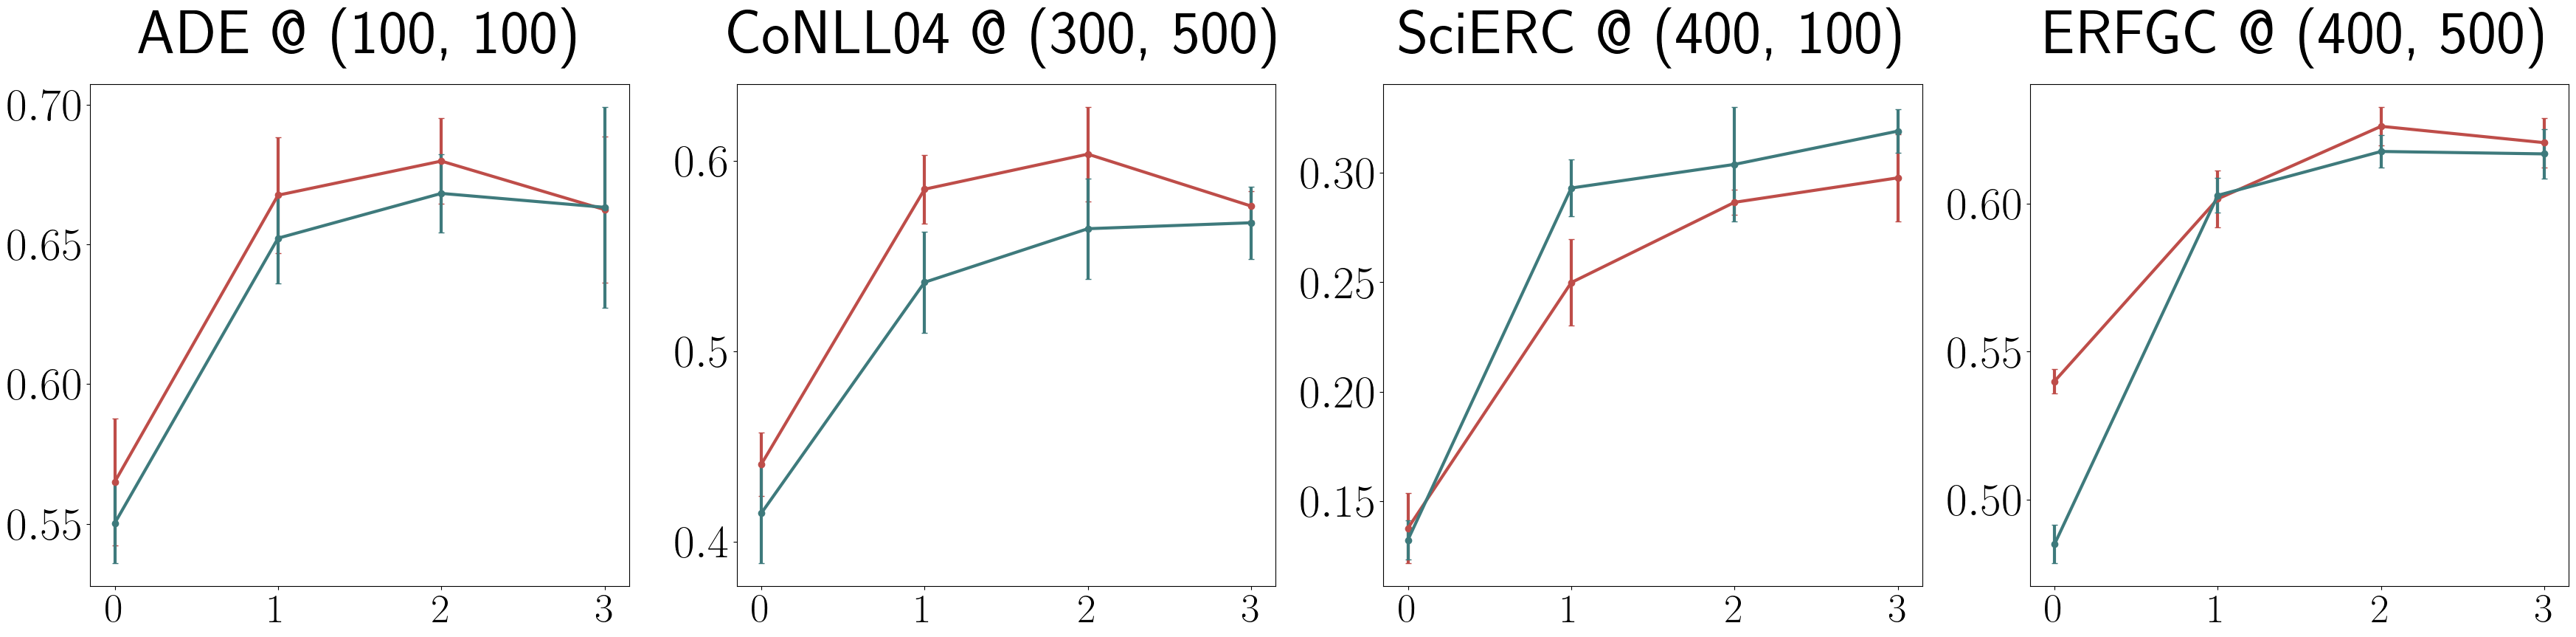

,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,1.30,ade,0.55706,0.014815
0,100,1,200,0,2.82,ade,0.65732,0.010462
2,100,2,200,0,3.79,ade,0.66608,0.011077
4,100,3,200,0,4.75,ade,0.67514,0.017890
1,100,0,0,1,1.30,ade,0.55384,0.015009
1,100,1,200,1,2.82,ade,0.66896,0.012640
3,100,2,200,1,3.79,ade,0.67456,0.014454
5,100,3,200,1,4.75,ade,0.69150,0.012554


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,1.34,conll04,0.41958,0.024041
0,100,1,300,0,4.04,conll04,0.57600,0.016998
2,100,2,300,0,6.21,conll04,0.60850,0.023189
4,100,3,300,0,8.37,conll04,0.58896,0.026914
1,100,0,0,1,1.34,conll04,0.42512,0.030779
1,100,1,300,1,4.04,conll04,0.58412,0.014674
3,100,2,300,1,6.21,conll04,0.59902,0.013675
5,100,3,300,1,8.37,conll04,0.58232,0.019294


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
2,300,0,0,0,1.79,scierc,0.15284,0.022583
6,300,1,300,0,4.39,scierc,0.27088,0.020864
8,300,2,300,0,6.55,scierc,0.29076,0.017417
10,300,3,300,0,8.71,scierc,0.25642,0.020554
3,300,0,0,1,1.79,scierc,0.18198,0.021116
7,300,1,300,1,4.39,scierc,0.27982,0.021062
9,300,2,300,1,6.55,scierc,0.31834,0.005742
11,300,3,300,1,8.71,scierc,0.32052,0.013450


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,1.44,yamakata,0.50368,0.010385
0,100,1,400,0,5.47,yamakata,0.60444,0.004688
2,100,2,400,0,9.32,yamakata,0.62584,0.009524
4,100,3,400,0,13.17,yamakata,0.62798,0.008725
1,100,0,0,1,1.44,yamakata,0.51388,0.008401
1,100,1,400,1,5.47,yamakata,0.60444,0.010795
3,100,2,400,1,9.32,yamakata,0.61478,0.008482
5,100,3,400,1,13.17,yamakata,0.61742,0.008025


ERFGC w/ tagger_rnn_flag = 1, tag_emb = 1


,index,par_rnn_l,arc_norm,test_f1,df_std
0,0,0,0,0.408290,0.179457
1,1,0,1,0.418705,0.166733
2,2,1,0,0.527160,0.174144
3,3,1,1,0.534335,0.173489
4,4,2,0,0.547795,0.173046
5,5,2,1,0.551675,0.158923
6,6,3,0,0.537125,0.190425
7,7,3,1,0.552940,0.161492


0.5373600000000001


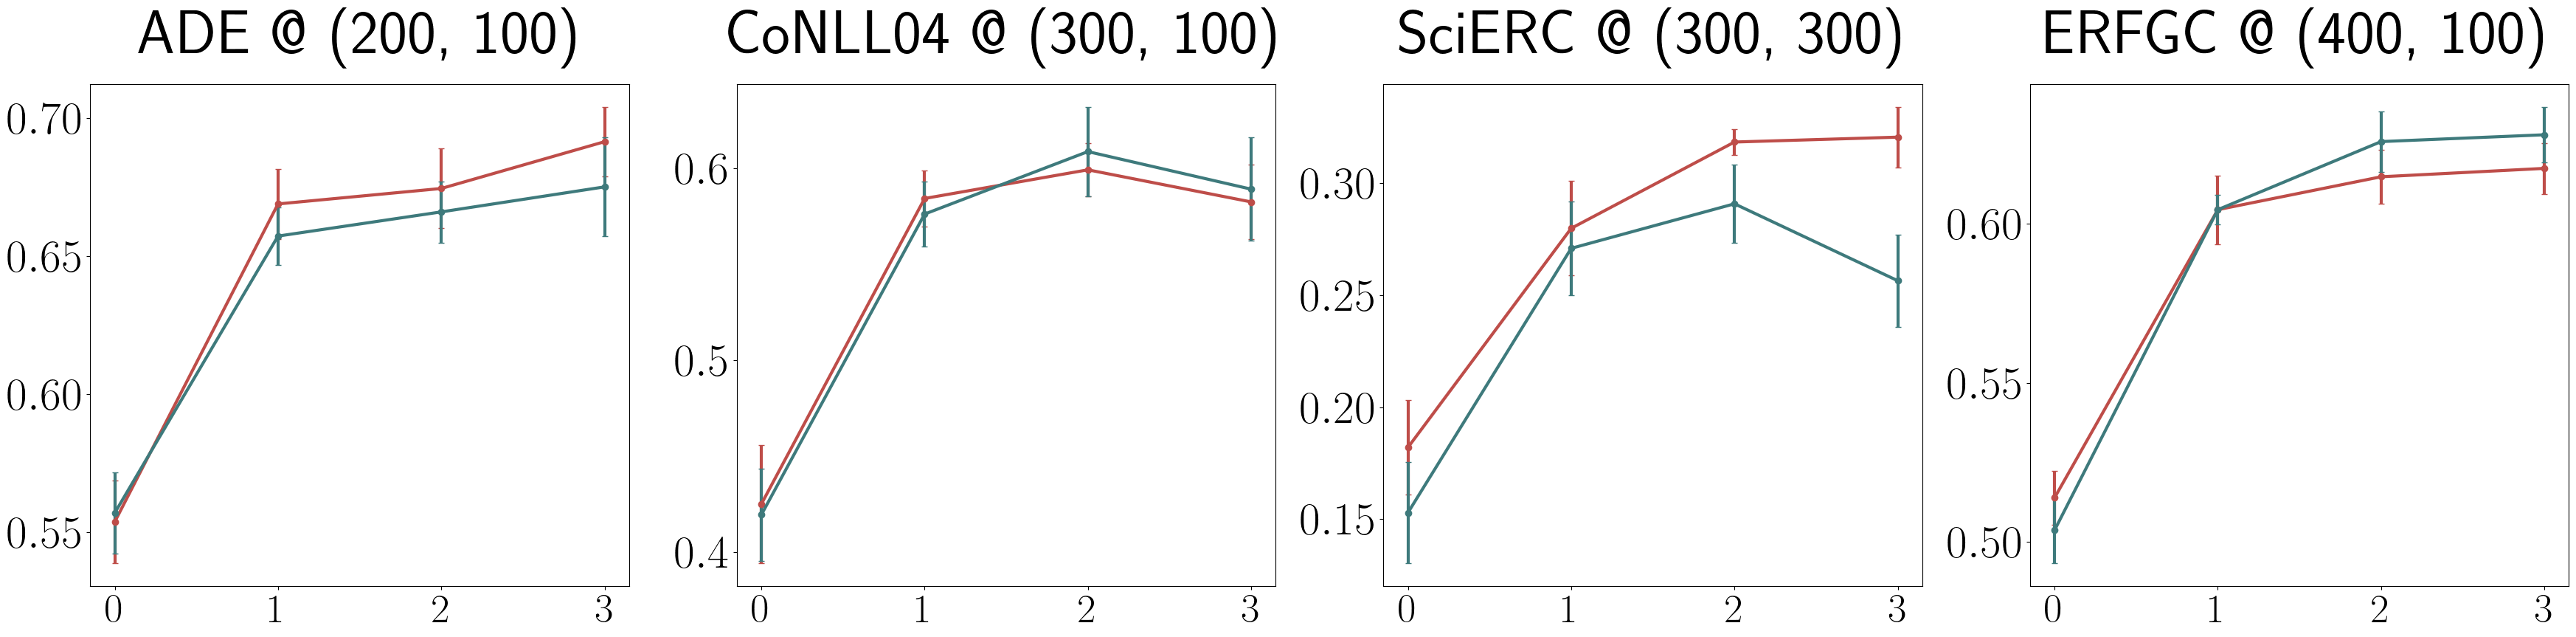

,metric,val_prec,val_recall,val_f1,test_prec,test_recall,test_f1,name,params,freeze_enc,lora,tag_emb,tag_rnn,par_rnn,par_rnn_l,par_rnn_h,data,par_type,par_gnn_layers,mlp_h,arc_norm,par_res,seed
1,parser_labeled_results,0.2342,0.2300,0.2321,0.2618,0.2492,0.2553,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,0
4,parser_labeled_results,0.3245,0.1970,0.2452,0.3487,0.1964,0.2513,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,1
7,parser_labeled_results,0.2511,0.2310,0.2406,0.3310,0.2872,0.3075,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,3
10,parser_labeled_results,0.2885,0.2620,0.2746,0.3541,0.2895,0.3186,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,4
13,parser_labeled_results,0.2673,0.2620,0.2646,0.3426,0.3131,0.3272,bert-base-uncased,3.02,frozen,/,0,0,LSTM,2,200,scierc,simple,0,300,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,parser_labeled_results,0.6083,0.4844,0.5393,0.5971,0.4918,0.5393,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,3
9349,parser_labeled_results,0.6222,0.5138,0.5628,0.5927,0.5112,0.5490,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,2
9352,parser_labeled_results,0.5894,0.4899,0.5351,0.5763,0.5082,0.5401,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,0
9355,parser_labeled_results,0.6264,0.5138,0.5645,0.6426,0.5187,0.5740,bert-base-uncased,3.85,frozen,/,1,0,LSTM,1,300,conll04,simple,0,500,0,0,1


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
4,500,0,0,0,1.20,ade,0.54928,0.014736
12,500,1,100,0,1.21,ade,0.63962,0.025987
14,500,2,100,0,1.45,ade,0.64296,0.014978
16,500,3,100,0,1.70,ade,0.67520,0.023061
5,500,0,0,1,1.20,ade,0.55466,0.020632
13,500,1,100,1,1.21,ade,0.67258,0.014176
15,500,2,100,1,1.45,ade,0.66220,0.019097
17,500,3,100,1,1.70,ade,0.67640,0.008252


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,0.38,conll04,0.41552,0.024548
0,100,1,200,0,1.79,conll04,0.58246,0.010825
2,100,2,200,0,2.75,conll04,0.58388,0.019119
4,100,3,200,0,3.72,conll04,0.59744,0.018360
1,100,0,0,1,0.38,conll04,0.42862,0.016294
1,100,1,200,1,1.79,conll04,0.53106,0.026911
3,100,2,200,1,2.75,conll04,0.55260,0.024614
5,100,3,200,1,3.72,conll04,0.59672,0.010156


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
2,300,0,0,0,0.80,scierc,0.14952,0.025886
6,300,1,400,0,4.57,scierc,0.29390,0.003800
8,300,2,400,0,8.41,scierc,0.27478,0.014555
10,300,3,400,0,12.26,scierc,0.30984,0.015926
3,300,0,0,1,0.80,scierc,0.18288,0.021541
7,300,1,400,1,4.57,scierc,0.28930,0.014294
9,300,2,400,1,8.41,scierc,0.29114,0.030717
11,300,3,400,1,12.26,scierc,0.31782,0.011605


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
4,500,0,0,0,1.34,yamakata,0.48092,0.015554
12,500,1,400,0,5.12,yamakata,0.59124,0.010728
14,500,2,400,0,8.97,yamakata,0.60592,0.008188
16,500,3,400,0,12.82,yamakata,0.61872,0.009482
5,500,0,0,1,1.34,yamakata,0.54024,0.006561
13,500,1,400,1,5.12,yamakata,0.60440,0.004393
15,500,2,400,1,8.97,yamakata,0.62706,0.006627
17,500,3,400,1,12.82,yamakata,0.62634,0.012672


ERFGC w/ tagger_rnn_flag = 0, tag_emb = 0


,index,par_rnn_l,arc_norm,test_f1,df_std
0,0,0,0,0.398810,0.174936
1,1,0,1,0.426600,0.171966
2,2,1,0,0.526805,0.157291
3,3,1,1,0.524335,0.167007
4,4,2,0,0.526885,0.169829
5,5,2,1,0.533250,0.167750
6,6,3,0,0.550300,0.163630
7,7,3,1,0.554320,0.161059


0.5346633333333334


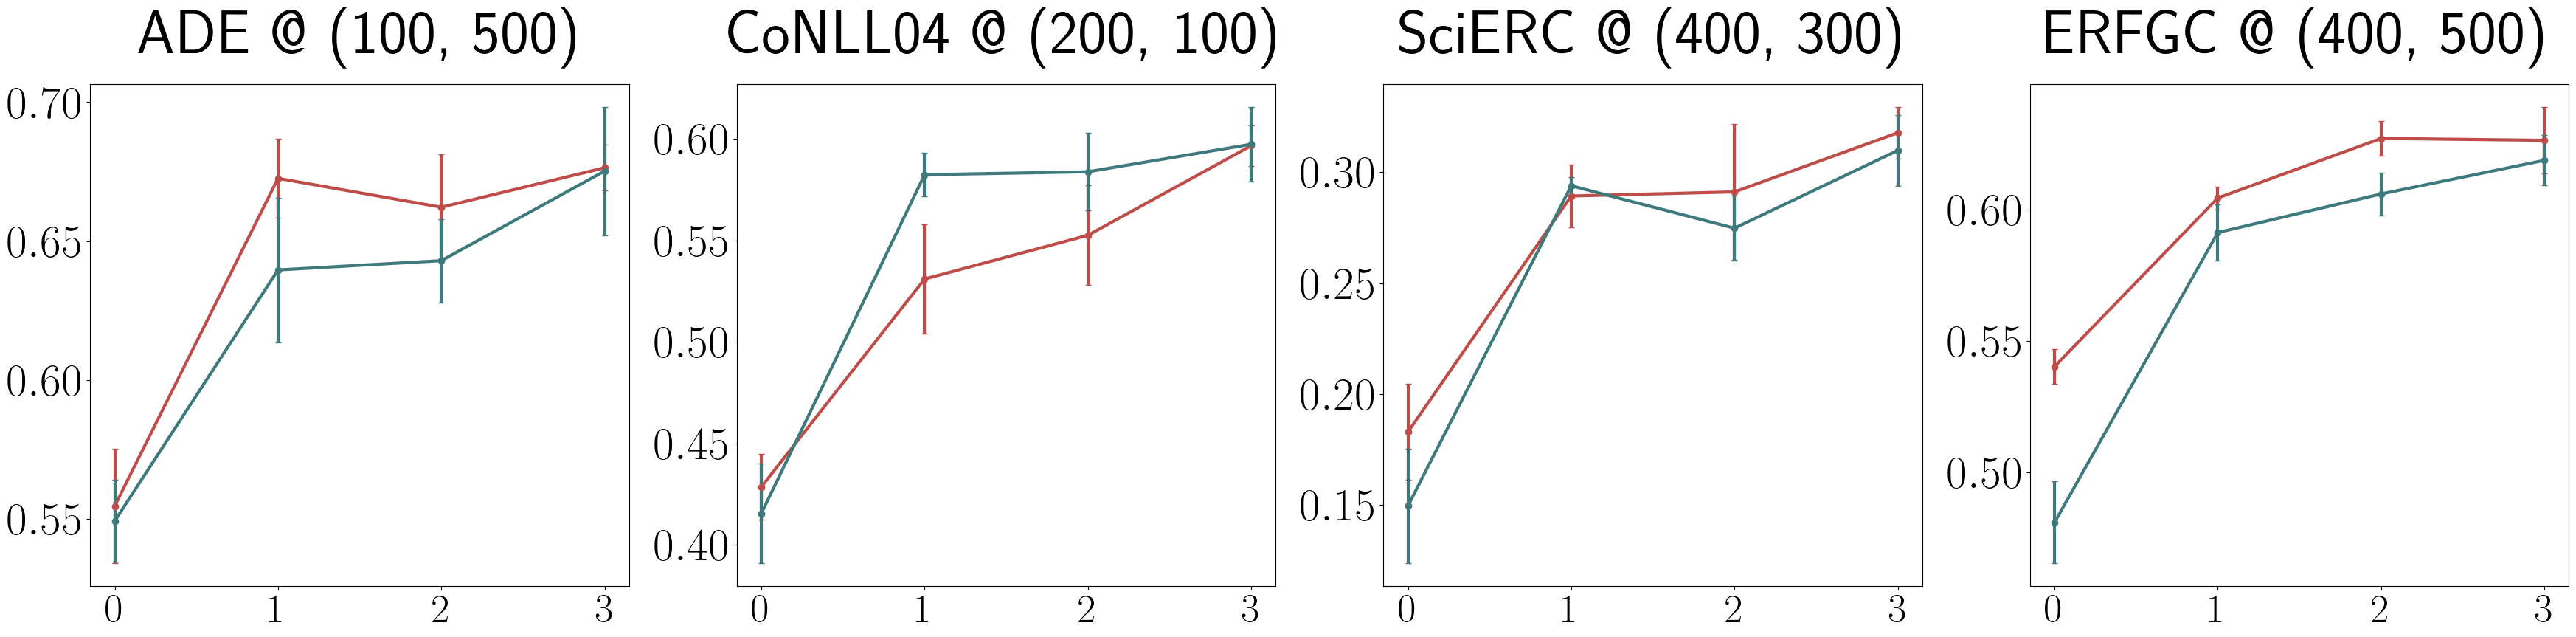

,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
2,300,0,0,0,0.81,ade,0.53666,0.018122
6,300,1,100,0,1.05,ade,0.64256,0.025509
8,300,2,100,0,1.29,ade,0.66958,0.013949
10,300,3,100,0,1.54,ade,0.65248,0.028098
3,300,0,0,1,0.81,ade,0.54762,0.014108
7,300,1,100,1,1.05,ade,0.67556,0.014492
9,300,2,100,1,1.29,ade,0.67788,0.009479
11,300,3,100,1,1.54,ade,0.67628,0.024686


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
4,500,0,0,0,1.36,conll04,0.38884,0.034427
12,500,1,400,0,5.34,conll04,0.53864,0.012741
14,500,2,400,0,9.19,conll04,0.54830,0.015102
16,500,3,400,0,13.04,conll04,0.57328,0.027217
5,500,0,0,1,1.36,conll04,0.43030,0.037664
13,500,1,400,1,5.34,conll04,0.58556,0.032656
15,500,2,400,1,9.19,conll04,0.58664,0.027337
17,500,3,400,1,13.04,conll04,0.60774,0.012879


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,0.45,scierc,0.13684,0.034134
0,100,1,200,0,1.98,scierc,0.29746,0.018324
2,100,2,200,0,2.94,scierc,0.30256,0.016240
4,100,3,200,0,3.90,scierc,0.31966,0.015010
1,100,0,0,1,0.45,scierc,0.15576,0.012693
1,100,1,200,1,1.98,scierc,0.26234,0.018051
3,100,2,200,1,2.94,scierc,0.29018,0.026924
5,100,3,200,1,3.90,scierc,0.28666,0.022498


,mlp_h,par_rnn_l,par_rnn_h,arc_norm,params,data,test_f1,df_std
0,100,0,0,0,0.53,yamakata,0.50616,0.007890
0,100,1,400,0,4.56,yamakata,0.60656,0.009006
2,100,2,400,0,8.41,yamakata,0.62286,0.009388
4,100,3,400,0,12.26,yamakata,0.62850,0.010980
1,100,0,0,1,0.53,yamakata,0.50742,0.006102
1,100,1,400,1,4.56,yamakata,0.61042,0.002976
3,100,2,400,1,8.41,yamakata,0.61784,0.004907
5,100,3,400,1,12.26,yamakata,0.61792,0.003167


ERFGC w/ tagger_rnn_flag = 0, tag_emb = 1


,index,par_rnn_l,arc_norm,test_f1,df_std
0,0,0,0,0.392125,0.181728
1,1,0,1,0.410275,0.176522
2,2,1,0,0.521305,0.155326
3,3,1,1,0.533470,0.184694
4,4,2,0,0.535825,0.163334
5,5,2,1,0.543135,0.172835
6,6,3,0,0.543480,0.152854
7,7,3,1,0.547150,0.176266


0.5335366666666667


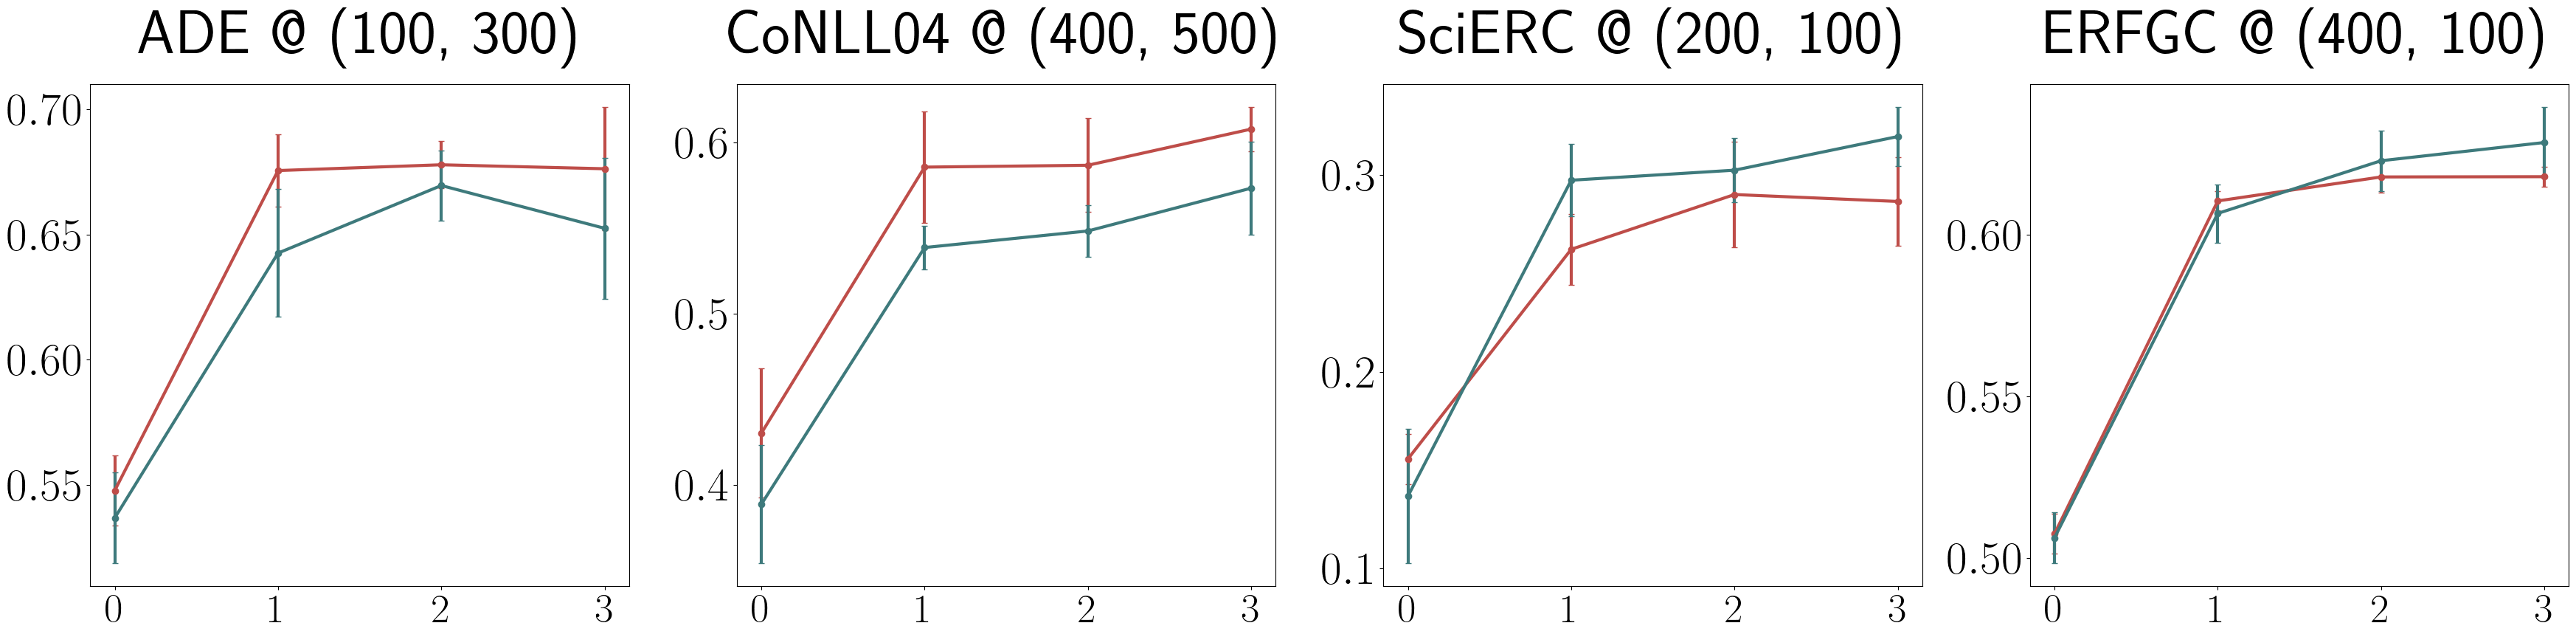

np.int64(1)

In [24]:
plt.rcParams['text.usetex'] = True
dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata',
]
tag_emb_options = [
    0,
    1,
    ]
df_list = [
    df_tagger,
    df_no_tagger,
    ]
grouping_cols = [
                # 'metric',
                'mlp_h',
                'par_rnn_l',
                'par_rnn_h',
                'arc_norm',
                'params',
                'data',
                ]
df_counter = 0
x_criterion = 'par_rnn_l'
color_criterion = 'mlp_h'
font_size_big = 60
font_size_med = 40

overall_best_list = []

for df_filtered in df_list:
    tagger_rnn_flag = df_filtered['tag_rnn'].unique()
    hidden_dims = sorted(df_filtered['par_rnn_h'].unique())[1:]
    mlp_out_dims = sorted(df_filtered['mlp_h'].unique())
    display(df_filtered)
    for tag_emb_opt in tag_emb_options:
        df_tag_emb = df_filtered[df_filtered['tag_emb'] == tag_emb_opt]
        a = 1
        b = 4
        f, axs = plt.subplots(a,
                            b,
                            sharex=True,
                            # sharey=True,
                            figsize=(b * 10, a * 10))
        # f.tight_layout(rect=[0, 0, 1, 1])
        # f.suptitle(f'Test F1 vs LSTM layer number. Tagger RNN = {tagger_rnn_flag[0]}. Tag Emb = {tag_emb_opt}.', fontsize = 18)
        # f.supxlabel(r'$L_\psi$', fontsize=font_size_big)       # global x-axis label
        # f.supylabel('Test F1 score', fontsize=font_size_big)   # global y-axis label
        f.subplots_adjust(bottom=0.20, left=0.06)
        df_best_list = []
        for i, dataset in enumerate(sorted(dataset_list)):
            df_combined_list_hdim = []
            best_mean_list_hdim = []
            df_data = df_tag_emb[df_tag_emb['data'] == dataset]
            # CHECK ACROSS LSTM HIDDEN DIMENSIONS
            for h_dim in hidden_dims:
                df_grouped_hdim = (df_data[df_data['par_rnn_h'] == h_dim]
                    .groupby(grouping_cols)['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_zero_hdim = (df_data[df_data['par_rnn_h'] == 0]
                    .groupby(grouping_cols)['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_combined_hdim = pd.concat([df_zero_hdim, df_grouped_hdim])

                df_combined_list_mlp_out = []
                best_mean_list_mlp_out = []
                # CHECK ACROSS MLP OUTPUT DIMENSIONS
                for mlp_out in mlp_out_dims:                    
                    df_grouped_mlp_out = df_combined_hdim[df_combined_hdim['mlp_h'] == mlp_out]

                    test_f1_norm_mean_mlp_out = df_grouped_mlp_out[(df_grouped_mlp_out['arc_norm'] == 1) & (df_grouped_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                    # print(f'test_f1_norm_mean_mlp_out', test_f1_norm_mean_mlp_out)
                    test_f1_raw_mean_mlp_out = df_grouped_mlp_out[(df_grouped_mlp_out['arc_norm'] == 0) & (df_grouped_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                    # print(f'test_f1_raw_mean_mlp_out', test_f1_raw_mean_mlp_out)
                    df_grouped_mlp_out = df_grouped_mlp_out.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
                    df_combined_list_mlp_out.append(df_grouped_mlp_out)
                    # display(df_grouped_mlp_out)
                    best_mean_list_mlp_out.append(max(test_f1_norm_mean_mlp_out, test_f1_raw_mean_mlp_out))
                
                best_mean_array_mlp_out = np.array(best_mean_list_mlp_out)
                best_df_idx_mlp_out = best_mean_array_mlp_out.argmax()
                df_best_mlp_out = df_combined_list_mlp_out[best_df_idx_mlp_out]
                # display(df_best_mlp_out)

                test_f1_norm_mean = df_best_mlp_out[(df_best_mlp_out['arc_norm'] == 1) & (df_best_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                # print(f'test_f1_norm_mean', test_f1_norm_mean)
                test_f1_raw_mean = df_best_mlp_out[(df_best_mlp_out['arc_norm'] == 0) & (df_best_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                # print(f'test_f1_raw_mean', test_f1_raw_mean)
                # print(test_f1_norm_mean > test_f1_raw_mean)
                df_best_mlp_out = df_best_mlp_out.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
                df_combined_list_hdim.append(df_best_mlp_out)
                best_mean_list_hdim.append(max(test_f1_norm_mean, test_f1_raw_mean))

            # I need to pick the dataframe with the highest mean test f1 (which is always with arc_norm == 1)
            best_mean_array = np.array(best_mean_list_hdim)
            best_df_idx = best_mean_array.argmax()
            df_best = df_combined_list_hdim[best_df_idx]
            # reorder columns
            df_best_list.append(df_best)
            display(df_best)
            data_name = data_name_dict[df_best['data'].unique()[0]]
            df_norm_best = df_best[(df_best['arc_norm'] == 1)]
            df_raw_best = df_best[(df_best['arc_norm'] == 0)]

            x = df_norm_best[x_criterion].astype(int).tolist()
            f1_norm_best = df_norm_best['test_f1'].tolist()
            f1_raw_best = df_raw_best['test_f1'].tolist()
            std_norm_best = df_norm_best['df_std'].tolist()
            std_raw_best = df_raw_best['df_std'].tolist()

            norm_scaling = 1 if df_norm_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
            # print(norm_scaling)
            raw_scaling = 1 if df_raw_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
            # print(raw_scaling)

            par_rnn_h_label = max(df_best['par_rnn_h'].unique())
            h_out_label = df_raw_best[color_criterion].unique()[0]
            tagger_rnn_flag_latex = r'\checkmark' if tagger_rnn_flag else r'\times'
            tag_emb_opt_latex = r'\checkmark' if tag_emb_opt else r'\times'
            figtitle = f"{data_name} @ " + r"$\psi_h$" + f" = {max(df_best['par_rnn_h'].unique())}, " + \
                    r"$h_{out}$ = " + f"{df_raw_best[color_criterion].unique()[0]} " + \
                    r"$\phi$" + f" = {tagger_rnn_flag_latex} " + \
                    r"$\textbf{e}_i^{tag} = \times$" + f" = {tagger_rnn_flag_latex}"
            setting_string = f'tagrnn{tagger_rnn_flag[0]}-tagemb{tag_emb_opt}'
            results_dir = os.path.join(paper_dir, setting_string)
            if not os.path.exists(results_dir):
                os.makedirs(results_dir)
            # df_best.to_csv(os.path.join(results_dir, f'{data_name}_{par_rnn_h_label}_{h_out_label}.csv'), float_format = '%.3f')
            filename_graph = f'{data_name}-hlstm{par_rnn_h_label}-hout{h_out_label}'
            reordered_cols = ['arc_norm', 'par_rnn_l', 'params', 'test_f1', 'df_std',]
            df_save = df_best[reordered_cols]
            df_save.to_latex(os.path.join(results_dir, f'{filename_graph}.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Results on {figtitle}.',
                            label=f'{filename_graph}-{setting_string}',
                            )

            # Normalized curves with error bars
            axs[i].errorbar(x, f1_norm_best, yerr=std_norm_best, fmt='-o', capsize=3, color='#BE4D49', label=f"a = {norm_scaling}", linewidth = 3)
                        # \ + ", $|\Theta|/10^{6} = $ {df_norm_best['params'].tolist()}")
            axs[i].errorbar(x, f1_raw_best, yerr=std_raw_best, fmt='-o', capsize=3, color='#3E7A7C', label=f"a = {raw_scaling}", linewidth = 3)
                        # \ + ", $|\Theta|/10^{6} = $ {df_raw_best['params'].tolist()}")
            # mean_std_norm = [np.array(el).mean() for el in zip(std_norm_best, std_norm_2, std_norm_3)]
            # mean_std_raw = [np.array(el).mean() for el in zip(std_raw_best, std_raw_2, std_raw_3)]
            # axs[i].plot(x, mean_std_norm, marker='o', linestyle='-', label='mean std (norm)', color='black')
            # axs[i].plot(x, mean_std_raw, marker='o', linestyle='--', label='mean std (raw)', color='black')

            # axs[i].grid(True)
            
            # axs[i].set_title(figtitle, fontsize = font_size_big, y = 1.05)
            axs[i].set_title(f"{data_name} @ ({par_rnn_h_label}, {h_out_label})", fontsize = font_size_big, y = 1.05)
            # axs[i].legend(loc='best', fontsize=font_size_med)

        grouping_cols_mean = [
                # 'metric',
                # 'mlp_h',
                'par_rnn_l',
                # 'par_rnn_h',
                'arc_norm',
                # 'params',
                # 'data',
                # 'df_std'
                ]
        df_mean_data = pd.concat(df_best_list).groupby(by=grouping_cols_mean)['test_f1'].agg(['mean', 'std']).reset_index().rename(columns={'mean': 'test_f1', 'std': 'df_std'}).reset_index()
        mean_data_title = f"{data_name} w/ tagger_rnn_flag = {tagger_rnn_flag[0]}, tag_emb = {tag_emb_opt}"
        print(mean_data_title)
        display(df_mean_data)
        df_norm_mean_best = df_mean_data[(df_mean_data['arc_norm'] == 1)]
        df_raw_mean_best = df_mean_data[(df_mean_data['arc_norm'] == 0)]

        x = df_norm_mean_best[x_criterion].astype(int).tolist()
        f1_norm_mean_best = df_norm_mean_best['test_f1'].tolist()
        overall_best_list.append(np.mean(f1_norm_mean_best[1:]))
        f1_raw_mean_best = df_raw_mean_best['test_f1'].tolist()
        std_norm_mean_best = df_norm_mean_best['df_std'].tolist()
        print(np.mean(f1_raw_mean_best[1:]))
        std_raw_mean_best = df_raw_mean_best['df_std'].tolist()

        i += 1

        # Normalized curves with error bars
        norm_scaling = 1 if df_norm_mean_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
        # print(norm_scaling)
        raw_scaling = 1 if df_raw_mean_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
        # print(raw_scaling)
        # axs[i].errorbar(x, f1_norm_mean_best, yerr=std_norm_mean_best, fmt='-o', capsize=3, label=f"a = {norm_scaling}", color='#BE4D49', linewidth = 3)
        # axs[i].errorbar(x, f1_raw_mean_best, yerr=std_raw_mean_best, fmt='-o', capsize=3, label=f"a = {raw_scaling}", color='#3E7A7C', linewidth = 3)
        # # axs[i].grid(True)
        # axs[i].set_title(r"$\bigcup_i^4 \mathcal(D)$", fontsize = font_size_big, y = 1.05)
        # axs[i].legend(loc='best', fontsize=font_size_med)
        # integer x‐ticks
        # xticks = sorted(df_grouped[x_criterion].astype(int).unique())
        # plt.xticks(xticks)
        
        # plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        # plt.xlabel(x_criterion)
        # plt.ylabel("Test F1 Score")
        # plt.legend(bbox_to_anchor=(0, 0, 1, 1))
        for ax in axs:
            ax.tick_params(axis='x', labelsize=font_size_med)
            ax.tick_params(axis='y', labelsize=font_size_med+5)
        filename = f'{a}x{b}-tagrnn{tagger_rnn_flag[0]}-tagemb{tag_emb_opt}.pdf'
        plt.savefig(os.path.join(paper_dir, filename), format = 'pdf')
        plt.show()
        plt.close()
overall_best = np.array(overall_best_list).argmax()
overall_best

# get Bhatt setting

In [ ]:
df_tagger

In [ ]:
df_bhatt = df_tagger
df_bhatt['name'] = 'bert'
df_bhatt = df_bhatt[df_bhatt['par_rnn_l'] == 3]
df_bhatt = df_bhatt[df_bhatt['par_rnn_h'] == 400]
df_bhatt = df_bhatt[df_bhatt['mlp_h'] == 500]
df_bhatt = df_bhatt[df_bhatt['tag_emb'] == 1]
# df_bhatt = df_bhatt[df_bhatt['arc_norm'] == 0]
df_bhatt = df_bhatt.groupby(by=['data', 'arc_norm'])['test_f1'].agg(['mean', 'std']).reset_index()
print(len(df_bhatt))
df_bhatt = df_bhatt.round(3)
display(df_bhatt)
df_bhatt['F1'] = df_bhatt.apply(lambda row: f"${row['mean']}"+r"\pm "+f"{row['std']}$", axis= 1)
df_bhatt = df_bhatt.drop(['mean', 'std'], axis = 1)
df_bhatt.to_latex(os.path.join(paper_dir, f'bhatt_results.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Bhatt results.',
                            label=f'tab:bhatt-results',
                            )
display(df_bhatt)

In [ ]:
raw_0 = [0.546, 0.405, 0.151, 0.489]
raw_0_mean = np.mean(raw_0)
raw_1 = [0.661, 0.572, 0.279, 0.595]
raw_1_mean = np.mean(raw_1)
raw_2 = [0.657, 0.558, 0.245, 0.608]
raw_2_mean = np.mean(raw_2)
raw_3 = [0.670, 0.591, 0.269, 0.619]
raw_3_mean = np.mean(raw_3)

norm_0 = [0.568, 0.442, 0.171, 0.537]
norm_0_mean = np.mean(norm_0)
norm_1 = [0.669, 0.597, 0.283, 0.606]
norm_1_mean = np.mean(norm_1)
norm_2 = [0.678, 0.595, 0.308, 0.625]
norm_2_mean = np.mean(norm_2)
norm_3 = [0.677, 0.596, 0.318, 0.626]
norm_3_mean = np.mean(norm_3)

print(np.round(norm_0_mean - raw_0_mean, 3))
print(np.round(norm_1_mean - raw_1_mean, 3))
print(np.round(norm_2_mean - raw_2_mean, 3))
print(np.round(norm_3_mean - raw_3_mean, 3))

In [ ]:
raw_0 = [0.663, 0.555, 0.269, 0.609]
raw_0_mean = np.mean(raw_0)

norm_0 = [0.660, 0.599, 0.318, 0.621]
norm_0_mean = np.mean(norm_0)

print(np.round(norm_0_mean - raw_0_mean, 3))

## 4x1 charts (all hidden sizes)

In [ ]:
# tag_emb_options = [
#     # '0',
#     '1',
#     ]  # sorted(df_filtered['tag_emb'].unique())
# df_list = [
#     df_tagger,
#     # df_no_tagger,
#     ]
# grouping_cols = [
#                 # 'metric',
#                 'mlp_h',
#                 'par_rnn_l',
#                 'par_rnn_h',
#                 'arc_norm',
#                 'params',
#                 # 'data',
#                 ]
# df_counter = 0
# for df_filtered in df_list:
#     print(len(df_filtered))
#     tagger_rnn_flag = df_filtered['tag_rnn'].unique()
#     hidden_sizes = sorted(df_filtered['par_rnn_h'].unique())[1:]
#     for tag_emb_opt in tag_emb_options:
#         df_tag_emb = df_filtered[df_filtered['tag_emb'] == tag_emb_opt]
#         for dataset in sorted(dataset_list):
#             df_data = df_tag_emb[df_tag_emb['data'] == dataset]
#             a = 1
#             b = 4
#             f, axs = plt.subplots(a, b, sharex=True, sharey=True, figsize=(b * 10, a * 10))
#             f.tight_layout(rect=[0, 0, 1, 0.92])
#             f.suptitle(f'Test F1 vs LSTM layer number. Dataset = {dataset.upper()}. Tagger RNN = {tagger_rnn_flag[0]}. Tag Emb = {tag_emb_opt}.',
#                        fontsize = 18)
#             f.supxlabel('par_rnn_l', fontsize=18)       # global x-axis label
#             f.supylabel('Test F1 Score', fontsize=18)   # global y-axis label
#             f.subplots_adjust(bottom=0.06, left=0.06)

#             for i, hs in enumerate(hidden_sizes):
#                 x_criterion = 'par_rnn_l'
#                 color_criterion = 'mlp_h'
#                 df_grouped = (df_data[df_data['par_rnn_h'] == hs]
#                     .groupby(grouping_cols)['test_f1']
#                     .agg(['mean', 'std'])
#                     .reset_index()
#                     .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
#                 ).sort_values(x_criterion)

#                 df_zero = (df_data[df_data['par_rnn_h'] == '0']
#                     .groupby(grouping_cols)['test_f1']
#                     .agg(['mean', 'std'])
#                     .reset_index()
#                     .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
#                 ).sort_values(x_criterion)

#                 df_combined = pd.concat([df_zero, df_grouped])
#                 df_combined = df_combined.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])

#                 df_counter += 1

#                 df_norm_0_1 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '100')]
#                 df_norm_0_2 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '300')]
#                 df_norm_0_3 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '500')]
#                 df_norm_1 = pd.concat([df_norm_0_1, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '100')]])
#                 df_norm_2 = pd.concat([df_norm_0_2, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '300')]])
#                 df_norm_3 = pd.concat([df_norm_0_3, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '500')]])
#                 df_raw_0_1 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '100')]
#                 df_raw_0_2 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '300')]
#                 df_raw_0_3 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '500')]
#                 df_raw_1 = pd.concat([df_raw_0_1, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '100')]])
#                 df_raw_2 = pd.concat([df_raw_0_2, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '300')]])
#                 df_raw_3 = pd.concat([df_raw_0_3, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '500')]])

#                 x = df_norm_1[x_criterion].astype(int).tolist()
                
#                 f1_norm_1 = df_norm_1['test_f1'].tolist()
#                 f1_norm_2 = df_norm_2['test_f1'].tolist()
#                 f1_norm_3 = df_norm_3['test_f1'].tolist()

#                 f1_raw_1 = df_raw_1['test_f1'].tolist()
#                 f1_raw_2 = df_raw_2['test_f1'].tolist()
#                 f1_raw_3 = df_raw_3['test_f1'].tolist()

#                 std_norm_1 = df_norm_1['df_std'].tolist()
#                 std_norm_2 = df_norm_2['df_std'].tolist()
#                 std_norm_3 = df_norm_3['df_std'].tolist()
#                 std_raw_1 = df_raw_1['df_std'].tolist()
#                 std_raw_2 = df_raw_2['df_std'].tolist()
#                 std_raw_3 = df_raw_3['df_std'].tolist()

#                 # Normalized curves with error bars
#                 axs[i].errorbar(x, f1_norm_1, yerr=std_norm_1,
#                             fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_1[color_criterion].unique()[0]}, arc_norm = {df_norm_1['arc_norm'].unique()[0]}, params = {df_norm_1['params'].tolist()}", color='red')
#                 axs[i].errorbar(x, f1_norm_2, yerr=std_norm_2,
#                             fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_2[color_criterion].unique()[0]}, arc_norm = {df_norm_2['arc_norm'].unique()[0]}, params = {df_norm_2['params'].tolist()}", color='green')
#                 axs[i].errorbar(x, f1_norm_3, yerr=std_norm_3,
#                             fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_3[color_criterion].unique()[0]}, arc_norm = {df_norm_3['arc_norm'].unique()[0]}, params = {df_norm_3['params'].tolist()}", color='blue')
                
#                 axs[i].errorbar(x, f1_raw_1, yerr=std_raw_1,
#                             fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_1[color_criterion].unique()[0]}, arc_norm = {df_raw_1['arc_norm'].unique()[0]}, params = {df_raw_1['params'].tolist()}", color='red')
#                 axs[i].errorbar(x, f1_raw_2, yerr=std_raw_2,
#                             fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_2[color_criterion].unique()[0]}, arc_norm = {df_raw_2['arc_norm'].unique()[0]}, params = {df_raw_2['params'].tolist()}", color='green')
#                 axs[i].errorbar(x, f1_raw_3, yerr=std_raw_3,
#                             fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_3[color_criterion].unique()[0]}, arc_norm = {df_raw_3['arc_norm'].unique()[0]}, params = {df_raw_3['params'].tolist()}", color='blue')
                
#                 # mean_std_norm = [np.array(el).mean() for el in zip(std_norm_1, std_norm_2, std_norm_3)]
#                 # mean_std_raw = [np.array(el).mean() for el in zip(std_raw_1, std_raw_2, std_raw_3)]
#                 # axs[i].plot(x, mean_std_norm, marker='o', linestyle='-', label='mean std (norm)', color='black')
#                 # axs[i].plot(x, mean_std_raw, marker='o', linestyle='--', label='mean std (raw)', color='black')

#                 axs[i].grid(True)
#                 axs[i].set_title(f'LSTM hidden size = {hs}', fontsize = 18)
#                 axs[i].legend(loc='best', fontsize='large')
#             # integer x‐ticks
#             xticks = sorted(df_grouped[x_criterion].astype(int).unique())
#             plt.xticks(xticks)
            
#             plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
#             plt.xlabel(x_criterion)
#             plt.ylabel("Test F1 Score")
#             plt.legend(bbox_to_anchor=(0, 0, 1, 1))
#             plt.show()
#             plt.close()
# # print(df_counter)

## 2x2 charts

In [ ]:
# tag_emb_options = [
#     # '0',
#     '1',
#     ]  # sorted(df_filtered['tag_emb'].unique())
# df_list = [
#     df_tagger,
#     # df_no_tagger,
#     ]
# grouping_cols = [
#                 # 'metric',
#                 'mlp_h',
#                 'par_rnn_l',
#                 'par_rnn_h',
#                 'arc_norm',
#                 'params',
#                 # 'data',
#                 ]
# df_counter = 0
# for df_filtered in df_list:
#     print(len(df_filtered))
#     tagger_rnn_flag = df_filtered['tag_rnn'].unique()
#     hidden_sizes = sorted(df_filtered['par_rnn_h'].unique())[1:]
#     for tag_emb_opt in tag_emb_options:
#         df_tag_emb = df_filtered[df_filtered['tag_emb'] == tag_emb_opt]
#         for dataset in sorted(dataset_list):
#             df_data = df_tag_emb[df_tag_emb['data'] == dataset]
#             a = 2
#             b = 2
#             f, axs = plt.subplots(a, b, sharex=True, sharey=True, figsize=(b * 10, a * 10))
#             f.tight_layout(rect=[0, 0, 1, 0.92])
#             f.suptitle(f'Test F1 vs LSTM layer number. Dataset = {dataset.upper()}. Tagger RNN = {tagger_rnn_flag[0]}. Tag Emb = {tag_emb_opt}.',
#                        fontsize = 18)
#             f.supxlabel('par_rnn_l', fontsize=18)       # global x-axis label
#             f.supylabel('Test F1 Score', fontsize=18)   # global y-axis label
#             f.subplots_adjust(bottom=0.05, left=0.06)

#             for i, hs in enumerate(hidden_sizes):
#                 bin_i = [int(el) for el in bin(i)[2:]]
#                 bin_i = [0 for _ in range(max(a,b) - len(bin_i))] + bin_i
#                 x_criterion = 'par_rnn_l'
#                 color_criterion = 'mlp_h'
#                 df_grouped = (df_data[df_data['par_rnn_h'] == hs]
#                     .groupby(grouping_cols)['test_f1']
#                     .agg(['mean', 'std'])
#                     .reset_index()
#                     .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
#                 ).sort_values(x_criterion)

#                 df_zero = (df_data[df_data['par_rnn_h'] == '0']
#                     .groupby(grouping_cols)['test_f1']
#                     .agg(['mean', 'std'])
#                     .reset_index()
#                     .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
#                 ).sort_values(x_criterion)

#                 # display(df_grouped)
#                 # display(df_zero)

#                 df_combined = pd.concat([df_zero, df_grouped])
#                 df_combined = df_combined.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
#                 # display(df_combined)
#                 # print(len(df_combined))
#                 df_counter += 1

#                 df_norm_0_1 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '100')]
#                 df_norm_0_2 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '300')]
#                 df_norm_0_3 = df_zero[(df_zero['arc_norm'] == '1') & (df_zero[color_criterion] == '500')]
#                 df_norm_1 = pd.concat([df_norm_0_1, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '100')]])
#                 df_norm_2 = pd.concat([df_norm_0_2, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '300')]])
#                 df_norm_3 = pd.concat([df_norm_0_3, df_grouped[(df_grouped['arc_norm'] == '1') & (df_grouped[color_criterion] == '500')]])
#                 df_raw_0_1 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '100')]
#                 df_raw_0_2 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '300')]
#                 df_raw_0_3 = df_zero[(df_zero['arc_norm'] == '0') & (df_zero[color_criterion] == '500')]
#                 df_raw_1 = pd.concat([df_raw_0_1, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '100')]])
#                 df_raw_2 = pd.concat([df_raw_0_2, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '300')]])
#                 df_raw_3 = pd.concat([df_raw_0_3, df_grouped[(df_grouped['arc_norm'] == '0') & (df_grouped[color_criterion] == '500')]])

#                 x = df_norm_1[x_criterion].astype(int).tolist()
                
#                 f1_norm_1 = df_norm_1['test_f1'].tolist()
#                 f1_norm_2 = df_norm_2['test_f1'].tolist()
#                 f1_norm_3 = df_norm_3['test_f1'].tolist()

#                 f1_raw_1 = df_raw_1['test_f1'].tolist()
#                 f1_raw_2 = df_raw_2['test_f1'].tolist()
#                 f1_raw_3 = df_raw_3['test_f1'].tolist()

#                 std_norm_1 = df_norm_1['df_std'].tolist()
#                 std_norm_2 = df_norm_2['df_std'].tolist()
#                 std_norm_3 = df_norm_3['df_std'].tolist()
#                 std_raw_1 = df_raw_1['df_std'].tolist()
#                 std_raw_2 = df_raw_2['df_std'].tolist()
#                 std_raw_3 = df_raw_3['df_std'].tolist()

#                 # Normalized curves with error bars
#                 axs[bin_i[0], bin_i[1]].errorbar(x, f1_norm_1, yerr=std_norm_1,
#                             fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_1[color_criterion].unique()[0]}, arc_norm = {df_norm_1['arc_norm'].unique()[0]}, params = {df_norm_1['params'].tolist()}", color='red')
#                 axs[bin_i[0], bin_i[1]].errorbar(x, f1_norm_2, yerr=std_norm_2,
#                             fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_2[color_criterion].unique()[0]}, arc_norm = {df_norm_2['arc_norm'].unique()[0]}, params = {df_norm_2['params'].tolist()}", color='green')
#                 axs[bin_i[0], bin_i[1]].errorbar(x, f1_norm_3, yerr=std_norm_3,
#                             fmt='-o', capsize=3, label=f"{color_criterion} = {df_norm_3[color_criterion].unique()[0]}, arc_norm = {df_norm_3['arc_norm'].unique()[0]}, params = {df_norm_3['params'].tolist()}", color='blue')
                
#                 axs[bin_i[0], bin_i[1]].errorbar(x, f1_raw_1, yerr=std_raw_1,
#                             fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_1[color_criterion].unique()[0]}, arc_norm = {df_raw_1['arc_norm'].unique()[0]}, params = {df_raw_1['params'].tolist()}", color='red')
#                 axs[bin_i[0], bin_i[1]].errorbar(x, f1_raw_2, yerr=std_raw_2,
#                             fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_2[color_criterion].unique()[0]}, arc_norm = {df_raw_2['arc_norm'].unique()[0]}, params = {df_raw_2['params'].tolist()}", color='green')
#                 axs[bin_i[0], bin_i[1]].errorbar(x, f1_raw_3, yerr=std_raw_3,
#                             fmt='--o', capsize=3, label=f"{color_criterion} = {df_raw_3[color_criterion].unique()[0]}, arc_norm = {df_raw_3['arc_norm'].unique()[0]}, params = {df_raw_3['params'].tolist()}", color='blue')
                
#                 # mean_std_norm = [np.array(el).mean() for el in zip(std_norm_1, std_norm_2, std_norm_3)]
#                 # mean_std_raw = [np.array(el).mean() for el in zip(std_raw_1, std_raw_2, std_raw_3)]
#                 # axs[bin_i[0], bin_i[1]].plot(x, mean_std_norm, marker='o', linestyle='-', label='mean std (norm)', color='black')
#                 # axs[bin_i[0], bin_i[1]].plot(x, mean_std_raw, marker='o', linestyle='--', label='mean std (raw)', color='black')

#                 axs[bin_i[0], bin_i[1]].grid(True)
#                 axs[bin_i[0], bin_i[1]].set_title(f'LSTM hidden size = {hs}', fontsize = 18)
#                 axs[bin_i[0], bin_i[1]].legend(loc='best', fontsize='large')
#             # integer x‐ticks
#             xticks = sorted(df_grouped[x_criterion].astype(int).unique())
#             plt.xticks(xticks)
            
#             plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
#             plt.xlabel(x_criterion)
#             plt.ylabel("Test F1 Score")
#             plt.legend(bbox_to_anchor=(0, 0, 1, 1))
#             plt.show()
#             plt.close()
# # print(df_counter)

# LoRA

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_steps_lora_ft'
df_aggregate_ft = load_results(walk_path)
dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata'
    ]

# for dataset in dataset_list:
    # df_aggregate_ft = df_aggregate_ft[df_aggregate_ft['data'] == dataset]
df_aggregate_ft = df_aggregate_ft[df_aggregate_ft['metric'] == 'parser_labeled_results']
df_aggregate_ft = df_aggregate_ft.sort_values(by='test_f1', ascending=False)
# df_aggregate_ft = df_aggregate_ft[df_aggregate_ft['par_rnn_l'] == 3]

# degrees of freedom
# print(df_aggregate_ft['tag_emb'].value_counts())
# print(df_aggregate_ft['arc_norm'].value_counts())
# print(df_aggregate_ft['freeze_enc'].value_counts())

display(df_aggregate_ft)

df_group = (
    df_aggregate_ft
    .groupby(['metric',
            'arc_norm',
            'tag_emb',
            # 'params',
            'data',
            'lora',
            ])['test_f1']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
)

df_group = df_group.sort_values(by=['tag_emb', 'arc_norm', 'data',])

# df_group = df_group[df_group['par_rnn_l'] == 3]
# df_group = df_group[df_group['arc_norm'] == 0]

df_group.to_latex(os.path.join(paper_dir, f'ft_lora_results.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Full fine-tuning and LoRA results.',
                            label=f'tab:full-ft-lora-results',
                            )
display(df_group)

# GNN results

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_steps_demo'
df_aggregate_gnn = load_results(walk_path)
display(df_aggregate_gnn)
df_group_gnn = df_aggregate_gnn.groupby('par_gnn_layers')['test_f1'].agg(['mean', 'std']).reset_index()
df_group_gnn

# LSTM complete results

In [ ]:
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations'
df_no_tagger = load_results(walk_path)
display(df_no_tagger)
walk_path = '/home/pgajo/projects/def-hsajjad/pgajo/mtrfg_results/results_lstm_size_ablations_tagger_rnn'
df_tagger = load_results(walk_path)
df_tagger = df_tagger[df_tagger['tag_rnn'] == 1]
display(df_tagger)

In [ ]:
tag_emb_opts = (0, 1)
df_list = [df_no_tagger, df_tagger]
for df in df_list:
    for tag_emb_option in tag_emb_opts:
        df_no_tagger_filtered = df[df['tag_emb'] == tag_emb_option]
        df_no_tagger_filtered
        df_no_tagger_group = df_no_tagger_filtered.groupby(by=[
                                'metric',
                                'data',
                                # 'tag_emb',
                                'par_rnn_l',
                                'arc_norm',
                                ],)['test_f1'].agg(['mean', 'std']).reset_index()

        df_no_tagger_group['mean_std'] = df_no_tagger_group.apply(
                lambda row: f"{row['mean']:.3f} ± {row['std']:.3f}", axis=1
            )
        df_no_tagger_group = df_no_tagger_group.drop(['mean', 'std'], axis=1)
        df_no_tagger_group

        tag_emb_flag = df_no_tagger_filtered['tag_emb'].unique()[0]
        tag_rnn_flag = df_no_tagger_filtered['tag_rnn'].unique()[0]

        pivot_df = df_no_tagger_group.pivot(
            values=['mean_std'],
            index=['arc_norm', 'par_rnn_l', 'metric'],
            columns='data'
        )
        pivot_df.to_latex(os.path.join(paper_dir, f'lstm_results_complete_tagemb-{tag_emb_flag}_tagrnn-{tag_rnn_flag}.tex'),
                                    float_format='%.3f',
                                    escape=True,
                                    # index=False,
                                    caption=f'Complete LSTM results - tagemb-{tag_emb_flag} - tagrnn-{tag_rnn_flag}.',
                                    label=f"tab:lstm-results-complete_tagemb-{tag_emb_flag}_tagrnn-{tag_rnn_flag}",
                                    )

In [ ]:
plt.rcParams['text.usetex'] = True
dataset_list = [
    'ade',
    'conll04',
    'scierc',
    'yamakata',
]
tag_emb_options = [
    0,
    1,
    ]  # sorted(df_filtered['tag_emb'].unique())
df_list = [
    df_tagger,
    df_no_tagger,
    ]
grouping_cols = [
                # 'metric',
                'mlp_h',
                'par_rnn_l',
                'par_rnn_h',
                'arc_norm',
                'params',
                'data',
                ]
df_counter = 0
x_criterion = 'par_rnn_l'
color_criterion = 'mlp_h'
font_size_big = 60
font_size_med = 40

overall_best_list = []

for df_filtered in df_list:
    tagger_rnn_flag = df_filtered['tag_rnn'].unique()
    hidden_dims = sorted(df_filtered['par_rnn_h'].unique())[1:]
    mlp_out_dims = sorted(df_filtered['mlp_h'].unique())
    display(df_filtered)
    for tag_emb_opt in tag_emb_options:
        df_tag_emb = df_filtered[df_filtered['tag_emb'] == tag_emb_opt]
        a = 1
        b = 5
        f, axs = plt.subplots(a,
                            b,
                            sharex=True,
                            # sharey=True,
                            figsize=(b * 10, a * 10))
        # f.tight_layout(rect=[0, 0, 1, 1])
        # f.suptitle(f'Test F1 vs LSTM layer number. Tagger RNN = {tagger_rnn_flag[0]}. Tag Emb = {tag_emb_opt}.', fontsize = 18)
        # f.supxlabel(r'$L_\psi$', fontsize=font_size_big)       # global x-axis label
        # f.supylabel('Test F1 score', fontsize=font_size_big)   # global y-axis label
        f.subplots_adjust(bottom=0.20, left=0.06)
        df_best_list = []
        for i, dataset in enumerate(sorted(dataset_list)):
            df_combined_list_hdim = []
            best_mean_list_hdim = []
            df_data = df_tag_emb[df_tag_emb['data'] == dataset]
            # CHECK ACROSS LSTM HIDDEN DIMENSIONS
            for h_dim in hidden_dims:
                df_grouped_hdim = (df_data[df_data['par_rnn_h'] == h_dim]
                    .groupby(grouping_cols)['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_zero_hdim = (df_data[df_data['par_rnn_h'] == 0]
                    .groupby(grouping_cols)['test_f1']
                    .agg(['mean', 'std'])
                    .reset_index()
                    .rename(columns={'mean': 'test_f1', 'std': 'df_std'})
                ).sort_values(x_criterion)

                df_combined_hdim = pd.concat([df_zero_hdim, df_grouped_hdim])

                df_combined_list_mlp_out = []
                best_mean_list_mlp_out = []
                # CHECK ACROSS MLP OUTPUT DIMENSIONS
                for mlp_out in mlp_out_dims:                    
                    df_grouped_mlp_out = df_combined_hdim[df_combined_hdim['mlp_h'] == mlp_out]

                    test_f1_norm_mean_mlp_out = df_grouped_mlp_out[(df_grouped_mlp_out['arc_norm'] == 1) & (df_grouped_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                    # print(f'test_f1_norm_mean_mlp_out', test_f1_norm_mean_mlp_out)
                    test_f1_raw_mean_mlp_out = df_grouped_mlp_out[(df_grouped_mlp_out['arc_norm'] == 0) & (df_grouped_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                    # print(f'test_f1_raw_mean_mlp_out', test_f1_raw_mean_mlp_out)
                    df_grouped_mlp_out = df_grouped_mlp_out.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
                    df_combined_list_mlp_out.append(df_grouped_mlp_out)
                    # display(df_grouped_mlp_out)
                    best_mean_list_mlp_out.append(max(test_f1_norm_mean_mlp_out, test_f1_raw_mean_mlp_out))
                
                best_mean_array_mlp_out = np.array(best_mean_list_mlp_out)
                best_df_idx_mlp_out = best_mean_array_mlp_out.argmax()
                df_best_mlp_out = df_combined_list_mlp_out[best_df_idx_mlp_out]
                # display(df_best_mlp_out)

                test_f1_norm_mean = df_best_mlp_out[(df_best_mlp_out['arc_norm'] == 1) & (df_best_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                # print(f'test_f1_norm_mean', test_f1_norm_mean)
                test_f1_raw_mean = df_best_mlp_out[(df_best_mlp_out['arc_norm'] == 0) & (df_best_mlp_out['par_rnn_h'] != 0)]['test_f1'].mean()
                # print(f'test_f1_raw_mean', test_f1_raw_mean)
                # print(test_f1_norm_mean > test_f1_raw_mean)
                df_best_mlp_out = df_best_mlp_out.sort_values(by=['arc_norm', 'mlp_h', 'par_rnn_l', 'par_rnn_h'])
                df_combined_list_hdim.append(df_best_mlp_out)
                best_mean_list_hdim.append(max(test_f1_norm_mean, test_f1_raw_mean))

            # I need to pick the dataframe with the highest mean test f1 (which is always with arc_norm == 1)
            best_mean_array = np.array(best_mean_list_hdim)
            best_df_idx = best_mean_array.argmax()
            df_best = df_combined_list_hdim[best_df_idx]
            # reorder columns
            df_best_list.append(df_best)
            # display(df_best)
            data_name = data_name_dict[df_best['data'].unique()[0]]
            df_norm_best = df_best[(df_best['arc_norm'] == 1)]
            df_raw_best = df_best[(df_best['arc_norm'] == 0)]

            x = df_norm_best[x_criterion].astype(int).tolist()
            f1_norm_best = df_norm_best['test_f1'].tolist()
            f1_raw_best = df_raw_best['test_f1'].tolist()
            std_norm_best = df_norm_best['df_std'].tolist()
            std_raw_best = df_raw_best['df_std'].tolist()

            norm_scaling = 1 if df_norm_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
            # print(norm_scaling)
            raw_scaling = 1 if df_raw_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
            # print(raw_scaling)

            par_rnn_h_label = max(df_best['par_rnn_h'].unique())
            h_out_label = df_raw_best[color_criterion].unique()[0]
            tagger_rnn_flag_latex = r'\checkmark' if tagger_rnn_flag else r'\times'
            tag_emb_opt_latex = r'\checkmark' if tag_emb_opt else r'\times'
            figtitle = f"{data_name} @ " + r"$\psi_h$" + f" = {max(df_best['par_rnn_h'].unique())}, " + \
                    r"$h_{out}$ = " + f"{df_raw_best[color_criterion].unique()[0]} " + \
                    r"$\phi$" + f" = {tagger_rnn_flag_latex} " + \
                    r"$\textbf{e}_i^{tag} = \times$" + f" = {tagger_rnn_flag_latex}"
            setting_string = f'tagrnn{tagger_rnn_flag[0]}-tagemb{tag_emb_opt}'
            results_dir = os.path.join(paper_dir, setting_string)
            if not os.path.exists(results_dir):
                os.makedirs(results_dir)
            # df_best.to_csv(os.path.join(results_dir, f'{data_name}_{par_rnn_h_label}_{h_out_label}.csv'), float_format = '%.3f')
            filename_graph = f'{data_name}-hlstm{par_rnn_h_label}-hout{h_out_label}'
            reordered_cols = ['arc_norm', 'par_rnn_l', 'params', 'test_f1', 'df_std',]
            df_save = df_best[reordered_cols]
            df_save.to_latex(os.path.join(results_dir, f'{filename_graph}.tex'),
                            float_format = '%.3f',
                            escape = True,
                            index=False,
                            caption=f'Results on {figtitle}.',
                            label=f'{filename_graph}-{setting_string}',
                            )

            # Normalized curves with error bars
            axs[i].errorbar(x, f1_norm_best, yerr=std_norm_best, fmt='-o', capsize=3, color='#BE4D49', label=f"a = {norm_scaling}", linewidth = 3)
                        # \ + ", $|\Theta|/10^{6} = $ {df_norm_best['params'].tolist()}")
            axs[i].errorbar(x, f1_raw_best, yerr=std_raw_best, fmt='-o', capsize=3, color='#3E7A7C', label=f"a = {raw_scaling}", linewidth = 3)
                        # \ + ", $|\Theta|/10^{6} = $ {df_raw_best['params'].tolist()}")
            # mean_std_norm = [np.array(el).mean() for el in zip(std_norm_best, std_norm_2, std_norm_3)]
            # mean_std_raw = [np.array(el).mean() for el in zip(std_raw_best, std_raw_2, std_raw_3)]
            # axs[i].plot(x, mean_std_norm, marker='o', linestyle='-', label='mean std (norm)', color='black')
            # axs[i].plot(x, mean_std_raw, marker='o', linestyle='--', label='mean std (raw)', color='black')

            # axs[i].grid(True)
            
            # axs[i].set_title(figtitle, fontsize = font_size_big, y = 1.05)
            axs[i].set_title(f"{data_name} @ ({par_rnn_h_label}, {h_out_label})", fontsize = font_size_big, y = 1.05)
            # axs[i].legend(loc='best', fontsize=font_size_med)

        grouping_cols_mean = [
                # 'metric',
                # 'mlp_h',
                'par_rnn_l',
                # 'par_rnn_h',
                'arc_norm',
                # 'params',
                # 'data',
                # 'df_std'
                ]
        df_mean_data = pd.concat(df_best_list).groupby(by=grouping_cols_mean)['test_f1'].agg(['mean', 'std']).reset_index().rename(columns={'mean': 'test_f1', 'std': 'df_std'}).reset_index()
        mean_data_title = f"{data_name} w/ tagger_rnn_flag = {tagger_rnn_flag[0]}, tag_emb = {tag_emb_opt}"
        print(mean_data_title)
        display(df_mean_data)
        df_norm_mean_best = df_mean_data[(df_mean_data['arc_norm'] == 1)]
        df_raw_mean_best = df_mean_data[(df_mean_data['arc_norm'] == 0)]

        x = df_norm_mean_best[x_criterion].astype(int).tolist()
        f1_norm_mean_best = df_norm_mean_best['test_f1'].tolist()
        overall_best_list.append(np.mean(f1_norm_mean_best[1:]))
        f1_raw_mean_best = df_raw_mean_best['test_f1'].tolist()
        std_norm_mean_best = df_norm_mean_best['df_std'].tolist()
        print(np.mean(f1_raw_mean_best[1:]))
        std_raw_mean_best = df_raw_mean_best['df_std'].tolist()

        i += 1

        # Normalized curves with error bars
        norm_scaling = 1 if df_norm_mean_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
        # print(norm_scaling)
        raw_scaling = 1 if df_raw_mean_best['arc_norm'].unique()[0] == 1 else r'$\frac{1}{\sqrt{d}}$'
        # print(raw_scaling)
        axs[i].errorbar(x, f1_norm_mean_best, yerr=std_norm_mean_best, fmt='-o', capsize=3, label=f"a = {norm_scaling}", color='#BE4D49', linewidth = 3)
        axs[i].errorbar(x, f1_raw_mean_best, yerr=std_raw_mean_best, fmt='-o', capsize=3, label=f"a = {raw_scaling}", color='#3E7A7C', linewidth = 3)
        # axs[i].grid(True)
        axs[i].set_title(r"$\bigcup_i^4 \mathcal(D)$", fontsize = font_size_big, y = 1.05)
        # axs[i].legend(loc='best', fontsize=font_size_med)
        # integer x‐ticks
        # xticks = sorted(df_grouped[x_criterion].astype(int).unique())
        # plt.xticks(xticks)
        
        # plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        # plt.xlabel(x_criterion)
        # plt.ylabel("Test F1 Score")
        # plt.legend(bbox_to_anchor=(0, 0, 1, 1))
        for ax in axs:
            ax.tick_params(axis='x', labelsize=font_size_med)
            ax.tick_params(axis='y', labelsize=font_size_med+5)
        filename = f'{a}x{b}-tagrnn{tagger_rnn_flag[0]}-tagemb{tag_emb_opt}.pdf'
        plt.savefig(os.path.join(paper_dir, filename), format = 'pdf')
        plt.show()
        plt.close()
overall_best = np.array(overall_best_list).argmax()
overall_best